In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble  import RandomForestClassifier 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# 1-Extraccion

In [2]:
data = pd.read_excel('Sumita 300 FINAL PARA CALUCHIN2.xlsx', header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,I CICLO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,MATRICULA,NaN,NaN,NaN,...,NaN,NaN,4 MES,NaN,NaN,NaN,5 MES,NaN,NaN,NaN
3,Alumno,DNI,Carrera,CicoActual,Estado_Alumno,Moroso,Periodo Academico,Duracion Modulo(meses),FechaPago\n,FechaMora\n,...,NroDocumento,Monto,FechaPago,FechaMora,NroDocumento,Monto,FechaPago,FechaMora,NroDocumento,Monto
4,ALVARADO GONZALES JHOAN FRANCISCO,69134457,Administracion de Negocios Internacionales,IV,A,0,2018-I,5,2018-03-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2-Transformacion

In [3]:
#Transposicion de la tabla=> intercambio de columnas y filas
tabla=data.T
tabla.head(6)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,NaN,NaN,NaN,Alumno,ALVARADO GONZALES JHOAN FRANCISCO,ALVARADO ALVARADO SEGUNDO CIRIRLO,ALVARADO MAGUIÑA LIZETH LUZMILA,ALZAMORA CALDERON GLORIA BONIFACIA,AMES BURGOS JOSE DANIEL,ANAYA SICSI SILVIA SUSANA,...,SULLCA LOPEZ MARHYCIELO MILAGROS,SULLON DIAZ JOSE MIGUEL,TADEO BRAVO LUCY,TADEO VILLANUEVA BERTHA,TAFUR SANTOS ELIDA MILAGROS,TALAVERA ESCOBAR JULIA TATIANA,TALAVERA OLORTEGUI FRANK JOEL,TARAZONA ABEL DE CERDA CLARISA BENEEZA,TARAZONA ESPINOZA THALIA ESMERALDA,TARAZONA MUÑOZ EDUARDO FRANCO
1,NaN,NaN,NaN,DNI,69134457,69134458,69134459,69134460,69134461,69134462,...,69134689,69134690,69134691,69134692,69134693,69134694,69134695,69134696,69134697,69134698
2,NaN,NaN,NaN,Carrera,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,...,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo
3,NaN,NaN,NaN,CicoActual,IV,IV,IV,IV,IV,IV,...,II,II,II,II,II,II,II,II,II,II
4,NaN,NaN,NaN,Estado_Alumno,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
5,NaN,NaN,NaN,Moroso,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


In [4]:
#Suprecion de la primera columna ya que esta vacia
tabla=tabla.drop(columns=[0])
tabla.head(20)

,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,301
0,NaN,NaN,Alumno,ALVARADO GONZALES JHOAN FRANCISCO,ALVARADO ALVARADO SEGUNDO CIRIRLO,ALVARADO MAGUIÑA LIZETH LUZMILA,ALZAMORA CALDERON GLORIA BONIFACIA,AMES BURGOS JOSE DANIEL,ANAYA SICSI SILVIA SUSANA,BONIFACIO ROSALES DEVIS GONZALO,...,SULLCA LOPEZ MARHYCIELO MILAGROS,SULLON DIAZ JOSE MIGUEL,TADEO BRAVO LUCY,TADEO VILLANUEVA BERTHA,TAFUR SANTOS ELIDA MILAGROS,TALAVERA ESCOBAR JULIA TATIANA,TALAVERA OLORTEGUI FRANK JOEL,TARAZONA ABEL DE CERDA CLARISA BENEEZA,TARAZONA ESPINOZA THALIA ESMERALDA,TARAZONA MUÑOZ EDUARDO FRANCO
1,NaN,NaN,DNI,69134457,69134458,69134459,69134460,69134461,69134462,69134463,...,69134689,69134690,69134691,69134692,69134693,69134694,69134695,69134696,69134697,69134698
2,NaN,NaN,Carrera,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,...,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo
3,NaN,NaN,CicoActual,IV,IV,IV,IV,IV,IV,IV,...,II,II,II,II,II,II,II,II,II,II
4,NaN,NaN,Estado_Alumno,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
5,NaN,NaN,Moroso,0,0,0,0,0,0,1,...,0,0,0,1,1,1,1,1,1,1
6,I CICLO,MATRICULA,Periodo Academico,2018-I,2018-I,2018-I,2018-I,2018-I,2018-I,2018-I,...,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I
7,NaN,NaN,Duracion Modulo(meses),5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,NaN,NaN,FechaPago\n,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,...,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00
9,NaN,NaN,FechaMora\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00


In [5]:
# Completamos los valores vacios con los ultimos valores para las tres primeras columnas
tabla[1]=tabla[1].str.strip().fillna(method='ffill')
tabla[2]=tabla[2].str.strip().fillna(method='ffill')
tabla[3]=tabla[3].str.strip().fillna(method='ffill')
tabla.head(20)

,1,2,3,4,5,6,7,8,9,10,...,292,293,294,295,296,297,298,299,300,301
0,NaN,NaN,Alumno,ALVARADO GONZALES JHOAN FRANCISCO,ALVARADO ALVARADO SEGUNDO CIRIRLO,ALVARADO MAGUIÑA LIZETH LUZMILA,ALZAMORA CALDERON GLORIA BONIFACIA,AMES BURGOS JOSE DANIEL,ANAYA SICSI SILVIA SUSANA,BONIFACIO ROSALES DEVIS GONZALO,...,SULLCA LOPEZ MARHYCIELO MILAGROS,SULLON DIAZ JOSE MIGUEL,TADEO BRAVO LUCY,TADEO VILLANUEVA BERTHA,TAFUR SANTOS ELIDA MILAGROS,TALAVERA ESCOBAR JULIA TATIANA,TALAVERA OLORTEGUI FRANK JOEL,TARAZONA ABEL DE CERDA CLARISA BENEEZA,TARAZONA ESPINOZA THALIA ESMERALDA,TARAZONA MUÑOZ EDUARDO FRANCO
1,NaN,NaN,DNI,69134457,69134458,69134459,69134460,69134461,69134462,69134463,...,69134689,69134690,69134691,69134692,69134693,69134694,69134695,69134696,69134697,69134698
2,NaN,NaN,Carrera,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,...,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo
3,NaN,NaN,CicoActual,IV,IV,IV,IV,IV,IV,IV,...,II,II,II,II,II,II,II,II,II,II
4,NaN,NaN,Estado_Alumno,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
5,NaN,NaN,Moroso,0,0,0,0,0,0,1,...,0,0,0,1,1,1,1,1,1,1
6,I CICLO,MATRICULA,Periodo Academico,2018-I,2018-I,2018-I,2018-I,2018-I,2018-I,2018-I,...,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I
7,I CICLO,MATRICULA,Duracion Modulo(meses),5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,I CICLO,MATRICULA,FechaPago,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,...,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00
9,I CICLO,MATRICULA,FechaMora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00


In [6]:
# Fusion de las 3 columnas en una columna llamada temp: 
# "I CICLO"  "2 MES"   "NroDocumento"     =>      "I CICLO;2 MES;NroDocumento"
tabla.insert(0, 'temp', '')
tabla['temp'] = tabla[tabla.columns[1:4]].apply(
    lambda x: ';'.join(x.dropna().astype(str)),
    axis=1
)
tabla.head(20)

,temp,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,Alumno,NaN,NaN,Alumno,ALVARADO GONZALES JHOAN FRANCISCO,ALVARADO ALVARADO SEGUNDO CIRIRLO,ALVARADO MAGUIÑA LIZETH LUZMILA,ALZAMORA CALDERON GLORIA BONIFACIA,AMES BURGOS JOSE DANIEL,ANAYA SICSI SILVIA SUSANA,...,SULLCA LOPEZ MARHYCIELO MILAGROS,SULLON DIAZ JOSE MIGUEL,TADEO BRAVO LUCY,TADEO VILLANUEVA BERTHA,TAFUR SANTOS ELIDA MILAGROS,TALAVERA ESCOBAR JULIA TATIANA,TALAVERA OLORTEGUI FRANK JOEL,TARAZONA ABEL DE CERDA CLARISA BENEEZA,TARAZONA ESPINOZA THALIA ESMERALDA,TARAZONA MUÑOZ EDUARDO FRANCO
1,DNI,NaN,NaN,DNI,69134457,69134458,69134459,69134460,69134461,69134462,...,69134689,69134690,69134691,69134692,69134693,69134694,69134695,69134696,69134697,69134698
2,Carrera,NaN,NaN,Carrera,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,...,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo
3,CicoActual,NaN,NaN,CicoActual,IV,IV,IV,IV,IV,IV,...,II,II,II,II,II,II,II,II,II,II
4,Estado_Alumno,NaN,NaN,Estado_Alumno,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
5,Moroso,NaN,NaN,Moroso,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
6,I CICLO;MATRICULA;Periodo Academico,I CICLO,MATRICULA,Periodo Academico,2018-I,2018-I,2018-I,2018-I,2018-I,2018-I,...,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I,2019-I
7,I CICLO;MATRICULA;Duracion Modulo(meses),I CICLO,MATRICULA,Duracion Modulo(meses),5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,I CICLO;MATRICULA;FechaPago,I CICLO,MATRICULA,FechaPago,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,2018-03-30 00:00:00,...,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00,2019-03-30 00:00:00
9,I CICLO;MATRICULA;FechaMora,I CICLO,MATRICULA,FechaMora,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00,2019-04-05 00:00:00


In [7]:
#Supresion de las columnas fusionadas, temp pasa a ser un indice de la tabla
tabla=tabla.drop(columns=[1,2,3])
tabla=tabla.set_index('temp')
tabla=tabla.rename_axis('', axis=0) # borramos el titulo 'temp'
tabla.head(5)

,4,5,6,7,8,9,10,11,12,13,...,292,293,294,295,296,297,298,299,300,301
,,,,,,,,,,,,,,,,,,,,,
Alumno,ALVARADO GONZALES JHOAN FRANCISCO,ALVARADO ALVARADO SEGUNDO CIRIRLO,ALVARADO MAGUIÑA LIZETH LUZMILA,ALZAMORA CALDERON GLORIA BONIFACIA,AMES BURGOS JOSE DANIEL,ANAYA SICSI SILVIA SUSANA,BONIFACIO ROSALES DEVIS GONZALO,BONIFAZ PIZARRO ALDO SEBASTIAN,BOZA PUMASONCO GERSON GUISSEPE,BRAVO ROJAS MARIA YOLANDA,...,SULLCA LOPEZ MARHYCIELO MILAGROS,SULLON DIAZ JOSE MIGUEL,TADEO BRAVO LUCY,TADEO VILLANUEVA BERTHA,TAFUR SANTOS ELIDA MILAGROS,TALAVERA ESCOBAR JULIA TATIANA,TALAVERA OLORTEGUI FRANK JOEL,TARAZONA ABEL DE CERDA CLARISA BENEEZA,TARAZONA ESPINOZA THALIA ESMERALDA,TARAZONA MUÑOZ EDUARDO FRANCO
DNI,69134457,69134458,69134459,69134460,69134461,69134462,69134463,69134464,69134465,69134466,...,69134689,69134690,69134691,69134692,69134693,69134694,69134695,69134696,69134697,69134698
Carrera,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,Administracion de Negocios Internacionales,...,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo,Secretariado Ejecutivo
CicoActual,IV,IV,IV,IV,IV,IV,IV,IV,IV,IV,...,II,II,II,II,II,II,II,II,II,II
Estado_Alumno,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A


In [8]:
#Transposicion entre las filas y columnas
tabla=tabla.T
tabla.head(5)

,Alumno,DNI,Carrera,CicoActual,Estado_Alumno,Moroso,I CICLO;MATRICULA;Periodo Academico,I CICLO;MATRICULA;Duracion Modulo(meses),I CICLO;MATRICULA;FechaPago,I CICLO;MATRICULA;FechaMora,...,VI CICLO;3 MES;NroDocumento,VI CICLO;3 MES;Monto,VI CICLO;4 MES;FechaPago,VI CICLO;4 MES;FechaMora,VI CICLO;4 MES;NroDocumento,VI CICLO;4 MES;Monto,VI CICLO;5 MES;FechaPago,VI CICLO;5 MES;FechaMora,VI CICLO;5 MES;NroDocumento,VI CICLO;5 MES;Monto
4,ALVARADO GONZALES JHOAN FRANCISCO,69134457,Administracion de Negocios Internacionales,IV,A,0,2018-I,5,2018-03-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ALVARADO ALVARADO SEGUNDO CIRIRLO,69134458,Administracion de Negocios Internacionales,IV,A,0,2018-I,5,2018-03-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ALVARADO MAGUIÑA LIZETH LUZMILA,69134459,Administracion de Negocios Internacionales,IV,A,0,2018-I,5,2018-03-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ALZAMORA CALDERON GLORIA BONIFACIA,69134460,Administracion de Negocios Internacionales,IV,A,0,2018-I,5,2018-03-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AMES BURGOS JOSE DANIEL,69134461,Administracion de Negocios Internacionales,IV,A,0,2018-I,5,2018-03-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# guardamos  DNI y Moroso en una tabla label
label = tabla[['DNI', 'Moroso']].copy()
# Borramos las columnas'Alumno','Carrera','CicoActual','Estado_Alumno', 'Moroso'
all_data=tabla.drop(columns=['Alumno','Carrera','CicoActual','Estado_Alumno', 'Moroso'])
all_data.head(5)

,DNI,I CICLO;MATRICULA;Periodo Academico,I CICLO;MATRICULA;Duracion Modulo(meses),I CICLO;MATRICULA;FechaPago,I CICLO;MATRICULA;FechaMora,I CICLO;MATRICULA;NroDocumento,I CICLO;MATRICULA;Monto,I CICLO;1 MES;FechaPago,I CICLO;1 MES;FechaMora,I CICLO;1 MES;NroDocumento,...,VI CICLO;3 MES;NroDocumento,VI CICLO;3 MES;Monto,VI CICLO;4 MES;FechaPago,VI CICLO;4 MES;FechaMora,VI CICLO;4 MES;NroDocumento,VI CICLO;4 MES;Monto,VI CICLO;5 MES;FechaPago,VI CICLO;5 MES;FechaMora,VI CICLO;5 MES;NroDocumento,VI CICLO;5 MES;Monto
4,69134457,2018-I,5,2018-03-30 00:00:00,NaN,123470,100,2018-03-30 00:00:00,NaN,123974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,69134458,2018-I,5,2018-03-30 00:00:00,NaN,123471,100,2018-03-30 00:00:00,NaN,123975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,69134459,2018-I,5,2018-03-30 00:00:00,NaN,123472,100,2018-03-30 00:00:00,NaN,123976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,69134460,2018-I,5,2018-03-30 00:00:00,NaN,123473,100,2018-03-30 00:00:00,NaN,123977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,69134461,2018-I,5,2018-03-30 00:00:00,NaN,123474,100,2018-03-30 00:00:00,NaN,123978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Mezclamos todas las columnas en 2 nuevas columnas Atributo y valor
all_data=all_data.melt(id_vars='DNI', var_name='atributo', value_name='Valor')
all_data.head(5)

,DNI,atributo,Valor
0,69134457,I CICLO;MATRICULA;Periodo Academico,2018-I
1,69134458,I CICLO;MATRICULA;Periodo Academico,2018-I
2,69134459,I CICLO;MATRICULA;Periodo Academico,2018-I
3,69134460,I CICLO;MATRICULA;Periodo Academico,2018-I
4,69134461,I CICLO;MATRICULA;Periodo Academico,2018-I


In [11]:
#descomponemos la columna atributo en tres nuevas columnas ciclo, mes y categoria
all_data[['Ciclo','Mes','Categoria']]=all_data["atributo"].str.split(";", expand = True) 
all_data=all_data.drop(columns=['atributo']) #borramos la columna atributo
all_data=all_data.sort_values(by=['DNI'])
all_data=all_data[['DNI','Ciclo','Mes','Categoria','Valor']] #cambiamos el orden de la columna
all_data.head(5)

,DNI,Ciclo,Mes,Categoria,Valor
45690,45341984,VI CICLO,5 MES,FechaMora,NaN
41518,45341984,VI CICLO,1 MES,Monto,200
21552,45341984,III CICLO,4 MES,NroDocumento,125807
21254,45341984,III CICLO,4 MES,FechaMora,NaN
34068,45341984,V CICLO,2 MES,FechaPago,2019-04-30 00:00:00


In [12]:
#Descomponemos las columnas categoria y valor, creamos nuevas columnas
all_data=pd.pivot_table(all_data, values = 'Valor', index=['DNI','Ciclo','Mes'], columns = 'Categoria', aggfunc='first').reset_index()
all_data.columns.name='' #supresion del titulo 'categoria'
all_data['Duracion Modulo(meses)']=all_data['Duracion Modulo(meses)'].fillna(method='bfill') #completamos los valores vacios
all_data['Periodo Academico']=all_data['Periodo Academico'].fillna(method='bfill') #completamos los valores vacios
all_data.head(5)

,DNI,Ciclo,Mes,Duracion Modulo(meses),FechaMora,FechaPago,Monto,NroDocumento,Periodo Academico
0,45341984,III CICLO,1 MES,3,NaN,2018-03-30 00:00:00,200,124295,2018-I
1,45341984,III CICLO,2 MES,3,NaN,2018-04-30 00:00:00,200,124799,2018-I
2,45341984,III CICLO,3 MES,3,NaN,2018-05-30 00:00:00,200,125303,2018-I
3,45341984,III CICLO,4 MES,3,NaN,2018-06-30 00:00:00,200,125807,2018-I
4,45341984,III CICLO,5 MES,3,NaN,2018-07-30 00:00:00,200,126311,2018-I


In [13]:
#Supresion de la columna Duracion Modulo(meses) ya que esta mala y tambien de nroDocumento ya que su valor no tiene sentido
all_data=all_data.drop(columns=['Duracion Modulo(meses)', 'NroDocumento'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 7 columns):
DNI                  5892 non-null int64
Ciclo                5892 non-null object
Mes                  5892 non-null object
FechaMora            2303 non-null object
FechaPago            5890 non-null object
Monto                5892 non-null object
Periodo Academico    5892 non-null object
dtypes: int64(1), object(6)
memory usage: 322.3+ KB


In [14]:
#valores faltantes para FechaPago: 2 filas
all_data[all_data['FechaPago'].isnull()]

,DNI,Ciclo,Mes,FechaMora,FechaPago,Monto,Periodo Academico
4566,69134679,IV CICLO,1 MES,2018-09-09 00:00:00,NaN,200,2018-II
4590,69134680,IV CICLO,1 MES,2018-09-09 00:00:00,NaN,200,2018-II


In [15]:
#Suppresion de las filas con valores faltantes para FechaPago
all_data=all_data.drop(index=all_data[all_data['FechaPago'].isnull()].index)

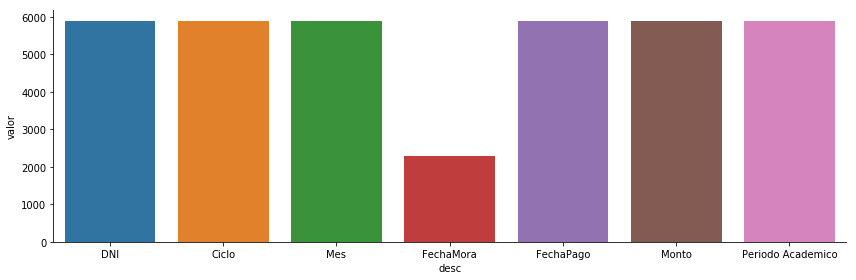

In [16]:
#Mostramos un grafico con el nro de datos por cada fila
temp=all_data.count().to_frame().reset_index()
temp.columns = ['desc','valor']
sns.catplot(data=temp, x='desc', y='valor',  kind="bar", height=4, aspect=3);

In [17]:
# Miramos los datos para el dni 45341984
all_data[all_data['DNI']==45341984].head(5)

,DNI,Ciclo,Mes,FechaMora,FechaPago,Monto,Periodo Academico
0,45341984,III CICLO,1 MES,NaN,2018-03-30 00:00:00,200,2018-I
1,45341984,III CICLO,2 MES,NaN,2018-04-30 00:00:00,200,2018-I
2,45341984,III CICLO,3 MES,NaN,2018-05-30 00:00:00,200,2018-I
3,45341984,III CICLO,4 MES,NaN,2018-06-30 00:00:00,200,2018-I
4,45341984,III CICLO,5 MES,NaN,2018-07-30 00:00:00,200,2018-I


In [18]:
#Agregamos los datos para tener una fila por alumno
data_grupo=all_data.groupby('DNI').agg({'Ciclo': ['nunique'], 'Mes': ['count'],  
                             'FechaMora': ['count'], 'FechaPago': ['count'], 'Periodo Academico': ['nunique']})
data_grupo.columns=data_grupo.columns.droplevel(1)
data_grupo=data_grupo.reset_index()
data_grupo.head(5)

,DNI,Ciclo,Mes,FechaMora,FechaPago,Periodo Academico
0,45341984,4,24,0,24,4
1,69134457,4,24,0,24,4
2,69134458,4,24,0,24,4
3,69134459,4,24,0,24,4
4,69134460,4,24,0,24,4


In [19]:
# Agregamos la columna moroso para sinchronizar el orden
label['DNI']=label['DNI'].astype(np.int64)
label['Moroso']=label['Moroso'].astype(np.bool_)
all_data = data_grupo.merge(label, left_on='DNI', right_on='DNI', how='inner').copy()
all_data.head(5)

,DNI,Ciclo,Mes,FechaMora,FechaPago,Periodo Academico,Moroso
0,45341984,4,24,0,24,4,False
1,69134457,4,24,0,24,4,False
2,69134458,4,24,0,24,4,False
3,69134459,4,24,0,24,4,False
4,69134460,4,24,0,24,4,False


In [20]:
#Guardamos nuevamente la columna moroso en otra variable y la Borramos de la tabla
target_number=all_data['Moroso']
all_data=all_data.drop(columns=['DNI'])
all_data=all_data.drop(columns=['Moroso'])
all_data.head(5)

,Ciclo,Mes,FechaMora,FechaPago,Periodo Academico
0,4,24,0,24,4
1,4,24,0,24,4
2,4,24,0,24,4
3,4,24,0,24,4
4,4,24,0,24,4


In [21]:
# Verificamos que no haya datos faltantes en ninguna columna
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 297
Data columns (total 5 columns):
Ciclo                298 non-null int64
Mes                  298 non-null int64
FechaMora            298 non-null int64
FechaPago            298 non-null int64
Periodo Academico    298 non-null int64
dtypes: int64(5)
memory usage: 14.0 KB


# 3-Modelizacion

In [22]:
def run_classifier(_depth):
    #dividimos la tabla en 2 partes: Entrenamiento (80%) y Prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(all_data.values, target_number, test_size=0.20, random_state=0, stratify=target_number)
    w=compute_sample_weight(class_weight='balanced', y=y_train) # calculamos la proporcion entre moroso y no moroso
    
    #Usamos el algoritmo RandomForest
    classifier = RandomForestClassifier(n_estimators=1,max_depth=_depth, class_weight="balanced_subsample", random_state=0)
    classifier.fit(X_train, y_train, sample_weight=w) #entrenamiento
    y_train_predicted = classifier.predict(X_train) # prediccion con datos de entrenamiento
    y_test_predicted = classifier.predict(X_test) #prediccion con datos de test
 
    print('TRAIN') #Calculo de la nota obtenida en entrenamiento
    print('f1_score:      ',metrics.f1_score(y_train, y_train_predicted, average='weighted'), '\nroc_auc_score: ', metrics.roc_auc_score(y_train, y_train_predicted, average='weighted'), '\n')
    print(classification_report(y_train, y_train_predicted))
    print('TEST') #Calculo de la nota obtenida en la prueba
    print('f1_score:      ',metrics.f1_score(y_test, y_test_predicted, average='weighted'), '\nroc_auc_score: ', metrics.roc_auc_score(y_test, y_test_predicted, average='weighted'), '\n')
    print(classification_report(y_test, y_test_predicted))
    
    #Ranking de la importancia de columnas, vemos que randon forest usa FechaMora,  las otras columnas no son usadas
    feat_labels = ['Ciclo', 'Mes','FechaMora','FechaPago','Periodo Academico']
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]

    print('RANKING DE VARIABLES')
    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]])) 

In [23]:
%%time
run_classifier(1)

TRAIN
f1_score:       0.9657224958949098 
roc_auc_score:  0.9411764705882353 

              precision    recall  f1-score   support

       False       1.00      0.88      0.94        68
        True       0.96      1.00      0.98       170

   micro avg       0.97      0.97      0.97       238
   macro avg       0.98      0.94      0.96       238
weighted avg       0.97      0.97      0.97       238

TEST
f1_score:       0.9484233417905037 
roc_auc_score:  0.9117647058823529 

              precision    recall  f1-score   support

       False       1.00      0.82      0.90        17
        True       0.93      1.00      0.97        43

   micro avg       0.95      0.95      0.95        60
   macro avg       0.97      0.91      0.93        60
weighted avg       0.95      0.95      0.95        60

RANKING DE VARIABLES
 1) FechaMora                      1.000000
 2) Periodo Academico              0.000000
 3) FechaPago                      0.000000
 4) Mes                            0